<a href="https://colab.research.google.com/github/samantharodas04/Proyecto-SP1/blob/main/ProyectoCOVIDCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparations



In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import image_dataset_from_directory

# For dataset manipulation
from keras.preprocessing import image
import numpy as np

# Miscellaneous Libraries
import os, os.path

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# 1) Dataset


## Setting up API

In [ ]:
# Cell used to link Kaggle API and Google Colab
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
kaggle.json


## Downloading

In [ ]:
# Downloading Dataset as ZIP
# Provide the API command here, don't forget to add the exclamation symbol at the beginning!
# The API command can be obtained in the Kaggle's page → Dataset Page → 3 dots (next to the black download button) → COPY API COMMAND
!kaggle datasets download -d pranavraikokte/covid19-image-dataset
# Unzipping Dataset
!unzip covid19-image-dataset.zip -d data

covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-image-dataset.zip
  inflating: data/Covid19-dataset/test/Covid/0100.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0102.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0105.png  
  inflating: data/Covid19-dataset/test/Covid/0106.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0108.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0111.jpg  
  inflating: data/Covid19-dataset/test/Covid/0112.jpg  
  inflating: data/Covid19-dataset/test/Covid/0113.jpg  
  inflating: data/Covid19-dataset/test/Covid/0115.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0118.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0119.jpeg  
  inflating: data/Covid19-dataset/test/Covid/0120.jpg  
  inflating: data/Covid19-dataset/test/Covid/094.png  
  inflating: data/Covid19-dataset/test/Covid/096.png  
  inflating: data/Covid19-dataset/test/Covid/098.jpeg  
  inflatin

## Setting up Directories

In [ ]:
# Renaming dataset root folder

!mv data/Covid19-dataset data/covid19-dataset

In [ ]:
test_split = 0.2

#Directories
base_dir = "data/covid19-dataset/"

train_dir = base_dir + "train/"

test_dir = base_dir + "test/"


In [ ]:
# Renaming Directory to something more comfortable
!mv data/covid19-dataset/test/Covid data/covid19-dataset/test/covid
!mv data/covid19-dataset/test/Normal data/covid19-dataset/test/normal
!mv data/covid19-dataset/test/Viral\ Pneumonia data/covid19-dataset/test/pneumonia

mv: cannot stat 'data/covid19-dataset/test/Covid': No such file or directory
mv: cannot stat 'data/covid19-dataset/test/Normal': No such file or directory
mv: cannot stat 'data/covid19-dataset/test/Viral Pneumonia': No such file or directory


In [ ]:
# Renaming Directory to something more comfortable
!mv data/covid19-dataset/train/Covid data/covid19-dataset/train/covid
!mv data/covid19-dataset/train/Normal data/covid19-dataset/train/normal
!mv data/covid19-dataset/train/Viral\ Pneumonia data/covid19-dataset/train/pneumonia

mv: cannot stat 'data/covid19-dataset/train/Covid': No such file or directory
mv: cannot stat 'data/covid19-dataset/train/Normal': No such file or directory
mv: cannot stat 'data/covid19-dataset/train/Viral Pneumonia': No such file or directory


In [ ]:
#Macrovariables
img_width = 176
img_height = 176

channels = 3

img_shape = (img_width, img_height, channels)

# Setting up Batch size
batch_size = 64

class_names = ["covid", "normal","pneumonia"]

classes = len(class_names)
# Setting up seed
seed = 996633

# Setting up validation split
validation_split = 0.2

In [ ]:
# IMPORTANT: REFER TO THE DOCUMENTATION OF THE FUNCITON:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

# Creating Train Dataset
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  train_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Tells the portion of images that will belong to validation
  validation_split=validation_split,

  # Tells what kind of dataset it is creating: training or validation
  subset="training",

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 251 files belonging to 3 classes.
Using 201 files for training.


In [ ]:
# Creating Validation Dataset
raw_validation_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  train_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Tells the portion of images that will belong to validation
  validation_split=validation_split,

  # Tells what kind of dataset it is creating: training or validation
  subset="validation",

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 251 files belonging to 3 classes.
Using 50 files for validation.


In [ ]:
# Creating Test Dataset

raw_test_dataset = tf.keras.utils.image_dataset_from_directory(
  # Give Directory's path
  test_dir,

  # Set to Inferred so the system automatically infers the labels
  labels='inferred',

  # (Refer to Documentation) Labels are encoded as 0 and 1
  label_mode="int",
  class_names=class_names,

  # Set to RGB since JPG images are in RGB
  color_mode="rgb",

  # Load in batches of 'batch_size'
  batch_size=batch_size,

  # Standarizes all images into the size put below
  image_size=(img_height, img_width),

  # Sets the random generator seed into a custom number
  seed=seed,

  # Tells if data should be shuffled or not
  shuffle=True,
)

Found 66 files belonging to 3 classes.


# Visualizing Data

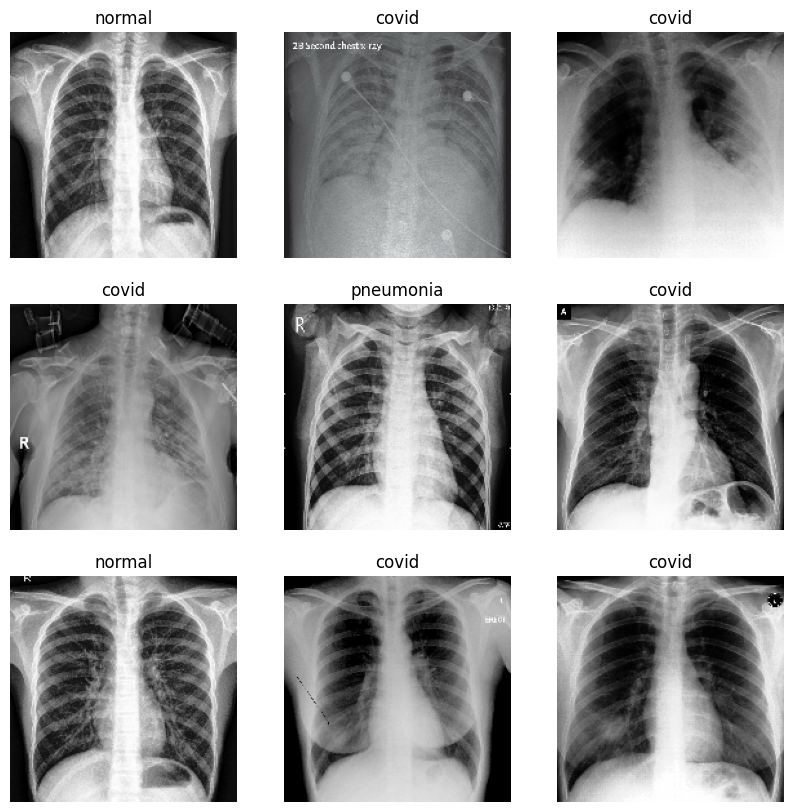

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in raw_train_dataset.take(1):
  #print(labels.numpy())
  for i in range(9):
    # Setting a graph plot for 3x3 images
    ax = plt.subplot(3, 3, i + 1)

    # Plotting the image. All images are converted to numpy and later casted to uint8
    plt.imshow(images[i].numpy().astype("uint8"))

    # Labels are converted from tensor to numpy numbers
    label = int(labels[i].numpy())
    plt.title(class_names[label])
    
    plt.axis("off")

# 2) Preprocessing

## Data augmentation

In [ ]:
# Lets perform random horizontal flip in 'train'
random_horizontal = tf.keras.layers.RandomFlip(mode="horizontal")

# Performing image augmentation on train
flipped_train_dataset = raw_train_dataset.map(lambda x, y: (random_horizontal(x), y))

# Merging original and flipped datasets
merged_train_dataset = raw_train_dataset.concatenate(flipped_train_dataset)

In [ ]:
axis = 1 if tf.keras.backend.image_data_format() == 'channels_first' else -1

def resize_images(images):
  s = np.expand_dims(images, axis)
  return tf.image.resize(s, [32, 32])

## Normalization

In [ ]:
# Defining the function for MinMax
minmax = tf.keras.layers.Rescaling(1./255)

# Normalizing
clean_train_dataset = merged_train_dataset.map(lambda x, y: (minmax(x), y))
clean_validation_dataset = raw_validation_dataset.map(lambda x, y: (minmax(x), y))
clean_test_dataset = raw_test_dataset.map(lambda x, y: (minmax(x), y))

In [ ]:
for img_batch, labels_batch in clean_train_dataset:
  print(labels_batch.numpy())
  break

[0 0 2 2 2 0 1 0 2 1 1 0 0 0 0 2 0 0 0 1 1 2 2 0 0 1 0 0 0 0 1 0 0 1 2 2 2
 1 1 0 0 2 1 1 2 0 2 0 0 0 2 1 0 1 1 0 0 0 2 0 2 1 1 2]


## Performance Config

In [ ]:
# This is to take advantage of Cache and prevent I/O operations from blocking the training pipeline
AUTOTUNE = tf.data.AUTOTUNE

clean_train_dataset = clean_train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
clean_validation_dataset = clean_validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)
clean_test_dataset = clean_test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 3) AI MODEL

## Callbacks

In [ ]:
# Early Stopping Callback
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4,)

In [ ]:
# Lets create the directory to store the checkpoints
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Lets create the actual Callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    save_freq='epoch'
  )

## Model

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=img_shape),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(3, activation="softmax")
  
])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
model.fit(x=clean_train_dataset,
          validation_data=clean_validation_dataset,
          epochs=100,
          callbacks=[earlystopping_callback, checkpoint_callback]
        )

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 1.7671 - accuracy: 0.3995
Epoch 1: val_loss improved from inf to 1.04102, saving model to training/cp-0001.ckpt
8/8 [==============================] - 28s 4s/step - loss: 1.7507 - accuracy: 0.3980 - val_loss: 1.0410 - val_accuracy: 0.3400
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 0.7843 - accuracy: 0.6260
Epoch 2: val_loss improved from 1.04102 to 0.52645, saving model to training/cp-0002.ckpt
8/8 [==============================] - 29s 4s/step - loss: 0.7753 - accuracy: 0.6343 - val_loss: 0.5265 - val_accuracy: 0.7600
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.3560 - accuracy: 0.8550
Epoch 3: val_loss improved from 0.52645 to 0.51589, saving model to training/cp-0003.ckpt
8/8 [==============================] - 15s 2s/step - loss: 0.3492 - accuracy: 0.8582 - val_loss: 0.5159 - val_accuracy: 0.7000
Epoch 4/100
7/8 [=========================>....] - ETA: 0s - loss: 0.2726 

# 4) Evaluation

## Loading Model Weights

In [ ]:
# Checking the last checkpoint - in this case, the last checkpoint is considered the 'best'
last_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)


In [ ]:
# Loading the weights into the model
model.load_weights("training/cp-0010.ckpt")

##Results

In [ ]:
model.evaluate(clean_train_dataset)

8/8 [==============================] - 0s 24ms/step - loss: 0.0077 - accuracy: 0.9975


[0.007737268693745136, 0.9975124597549438]

In [ ]:
model.evaluate(clean_test_dataset)

2/2 [==============================] - 0s 11ms/step - loss: 0.1744 - accuracy: 0.9394


[0.17444097995758057, 0.939393937587738]

## Confusion Matrix

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(6, 6))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
# Declaring Variables
model_predictions = []
test_labels = []

for image_batch, labels_batch in clean_test_dataset:
  # Extracting images and doing predictions
  predictions = model.predict(x=image_batch)
  predictions = list(map(lambda x: np.argmax(x), predictions))

  # Extracting labels
  labels = list(map(lambda x: int(x), labels_batch.numpy()))
  
  # Appending
  model_predictions += predictions
  test_labels += labels

1/1 [==============================] - 0s 79ms/step


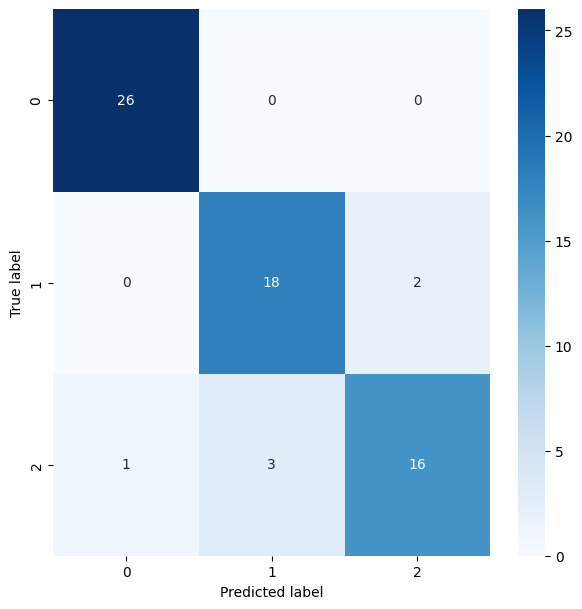

In [ ]:
# Lets plot the confusion matrix to check if there is any kind of bias
plot_confusion_matrix(labels=test_labels, predictions=model_predictions)